## Loan Prediction : 

#### Importing libraries :

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset :

In [195]:
# collecting the train data
df_train=pd.read_csv('loan-train.csv')

In [196]:
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [197]:
df_train.shape

(614, 13)

In [198]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### handling null values :

In [199]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [200]:
# Seperate numerical variable and categorical variable:
num_var=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
cat_var=[col for col in df_train.columns.to_list() if col not in num_var]
print(f'The numerical variables are : {num_var}')
print(f'The categorical variables are : {cat_var}')

The numerical variables are : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
The categorical variables are : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [201]:
# for numerical variables:
for col in num_var:
    df_train[col].fillna(df_train[col].mean(),inplace=True)

In [202]:
# for categorical variables:
for col in cat_var:
    df_train[col].fillna(df_train[col].mode()[0],inplace=True)

In [203]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### EDA :

In [204]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Correlation Matrix

<AxesSubplot:>

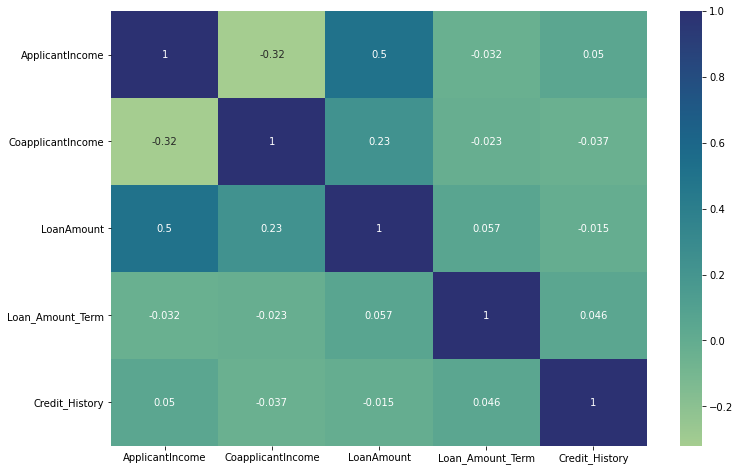

In [205]:
plt.figure(figsize=(12,8))
corr=df_train.corr(method='spearman')
sns.heatmap(corr,annot=True,cmap="crest",robust=True)

visualization for categorical attributes :

In [206]:
cat_var.remove('Loan_ID')

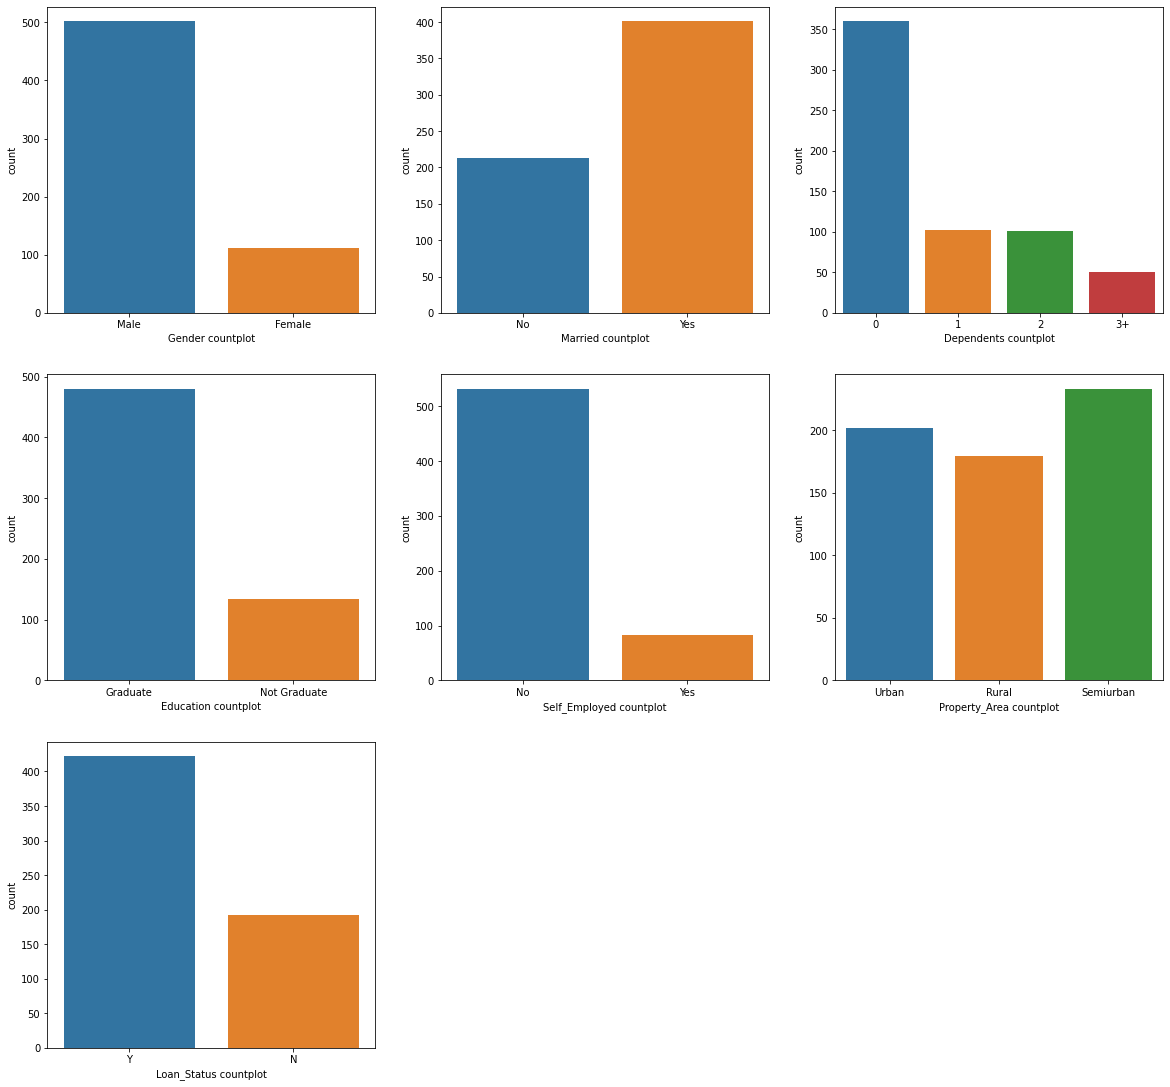

In [207]:
plt.figure(figsize=(20,80))
plotnumber=1
for col in cat_var:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(x=col,data=df_train)
    plt.xlabel(f'{col} countplot')
    plotnumber+=1

### Important Points: 
1. There are more male customers as compared to female customers.

2. Most of the customers are married.

3. Most of the customers (more than 350) don't have any dependents.

4. The number of graduate customers is more than the non graduate. But most of the customers are not self employed.

visualization for numerical attributes :

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

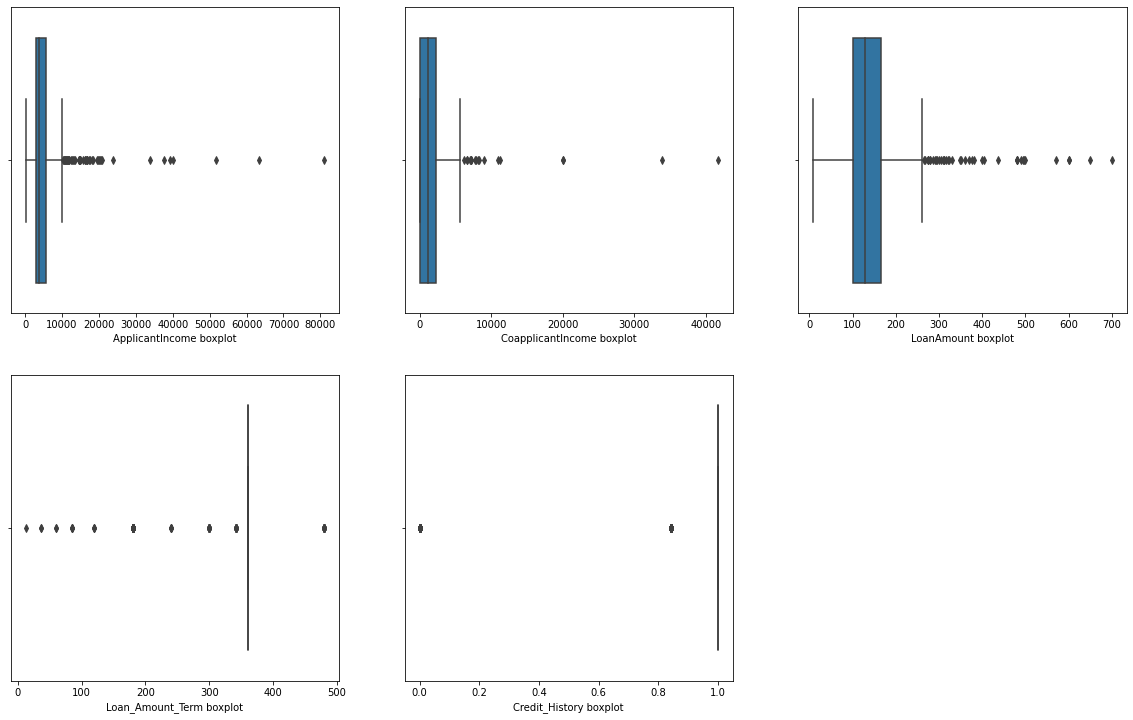

In [208]:
plt.figure(figsize=(20,80))
plotnumber=1
for col in num_var:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df_train[col])
    plt.xlabel(f'{col} boxplot')
    plotnumber+=1

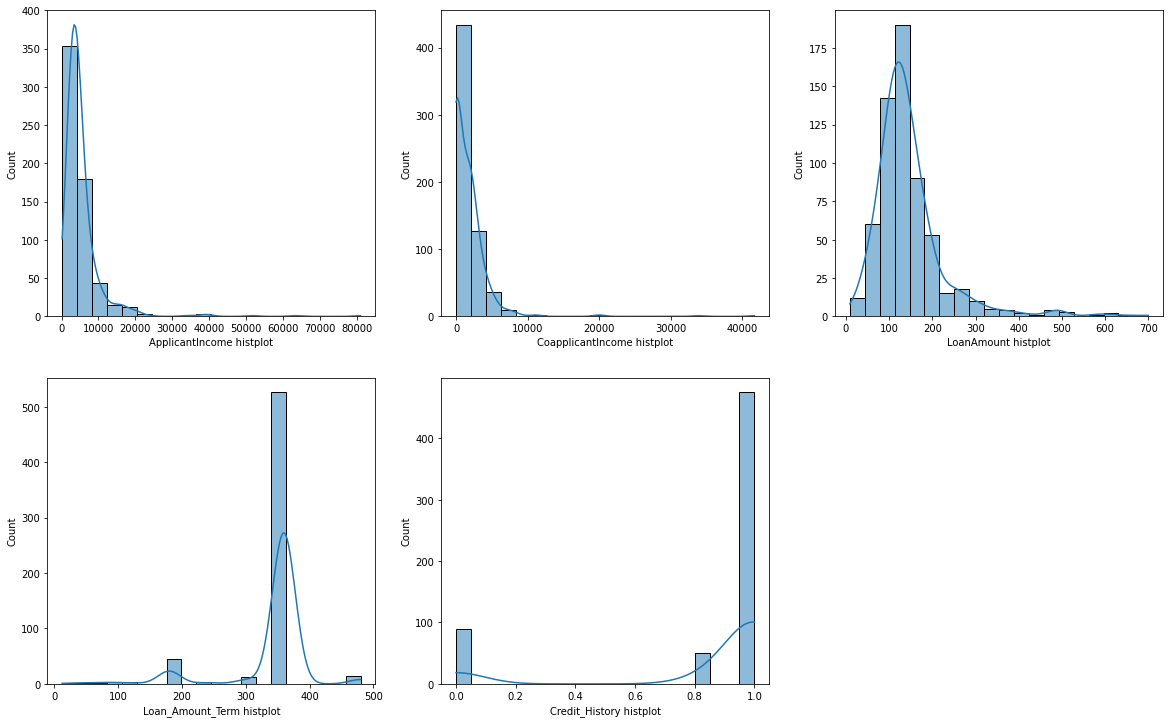

In [210]:
plt.figure(figsize=(20,80))
plotnumber=1
for col in num_var:
    ax=plt.subplot(12,3,plotnumber)
    sns.histplot(x=df_train[col],kde=True,bins=20 )
    plt.xlabel(f'{col} histplot')
    plotnumber+=1

From the above two plots it can be concluded that ApplicantIncome, CoapplicantIncome and LoanAmount have outliers and right skewed. So let's use normalization in these features. Also, since ApplicantIncome and CoapplicantIncome are highly correlated so remove them and make a new feature TotalIncome instead of these two variables.

In [211]:
df_train['LoanAmount_log']=np.log(df_train['LoanAmount']+1)

<AxesSubplot:>

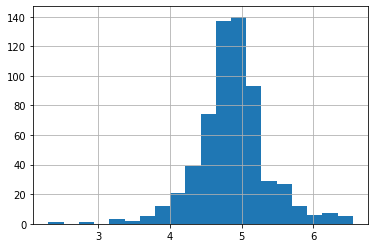

In [212]:
df_train['LoanAmount_log'].hist(bins=20)

In [213]:
df_train['Total_Income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']

In [214]:
df_train=df_train.drop(columns='ApplicantIncome')
df_train=df_train.drop(columns='CoapplicantIncome')

In [215]:
df_train['Total_Income_log']=np.log(df_train['Total_Income'])

<AxesSubplot:>

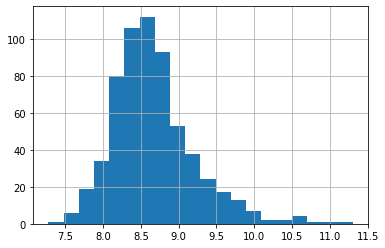

In [216]:
df_train['Total_Income_log'].hist(bins=20)

In [217]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Gender            614 non-null    object 
 2   Married           614 non-null    object 
 3   Dependents        614 non-null    object 
 4   Education         614 non-null    object 
 5   Self_Employed     614 non-null    object 
 6   LoanAmount        614 non-null    float64
 7   Loan_Amount_Term  614 non-null    float64
 8   Credit_History    614 non-null    float64
 9   Property_Area     614 non-null    object 
 10  Loan_Status       614 non-null    object 
 11  LoanAmount_log    614 non-null    float64
 12  Total_Income      614 non-null    float64
 13  Total_Income_log  614 non-null    float64
dtypes: float64(6), object(8)
memory usage: 67.3+ KB


Label Encoding :

In [218]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for col in cols:
    df_train[col]=le.fit_transform(df_train[col])

### Train Test Split :

In [219]:
y=df_train['Loan_Status']

In [220]:
X=df_train.drop(columns='Loan_Status',axis=1)

In [221]:
X=X.drop(columns='Loan_ID',axis=1)

In [222]:

X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'LoanAmount_log', 'Total_Income', 'Total_Income_log'],
      dtype='object')

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [225]:
from sklearn.metrics import accuracy_score, classification_report

### Model Training : 

In [226]:
# Logistic Regression :
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)

In [227]:
print(f'accuracy score is : {accuracy_score(y_pred,y_test)}')
print(f'classification score is : {classification_report(y_pred,y_test)}')

accuracy score is : 0.8311688311688312
classification score is :               precision    recall  f1-score   support

           N       0.47      0.87      0.61        23
           Y       0.97      0.82      0.89       131

    accuracy                           0.83       154
   macro avg       0.72      0.85      0.75       154
weighted avg       0.90      0.83      0.85       154



In [229]:
# Decision Tree :
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=100 ,criterion="gini",max_depth=10,min_samples_split=2,max_features='sqrt')
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print(f'accuracy score is : {accuracy_score(y_pred,y_test)}')
print(f'classification score is : {classification_report(y_pred,y_test)}')

accuracy score is : 0.7467532467532467
classification score is :               precision    recall  f1-score   support

           N       0.60      0.54      0.57        48
           Y       0.80      0.84      0.82       106

    accuracy                           0.75       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



In [231]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_model=rf_model.predict(X_test)
print(f'accuracy score is : {accuracy_score(y_pred,y_test)}')
print(f'classification score is : {classification_report(y_pred,y_test)}')


accuracy score is : 0.7467532467532467
classification score is :               precision    recall  f1-score   support

           N       0.60      0.54      0.57        48
           Y       0.80      0.84      0.82       106

    accuracy                           0.75       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



### Hyperparameter Tuning :

In [232]:
# Randomized Search CV:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=20)]
criterion=['gini','entropy']
max_features=['sqrt','auto','log2']
max_depth=[int(x) for x in np.linspace(10,1000,10)]
min_samples_split=[2,5,10,14]
min_samples_leaf=[1,2,4,6,8]



In [233]:
random_grid={
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [234]:
rf_random_cv=RandomizedSearchCV(estimator=rf_model,param_distributions=random_grid,cv=3,random_state=0,n_iter=100,n_jobs=-1,)

In [235]:
rf_random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
         

In [236]:
rf_random_cv.best_params_

{'n_estimators': 384,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 230,
 'criterion': 'entropy'}

In [237]:
best_random_grid=rf_random_cv.best_estimator_

In [238]:
y_pred=best_random_grid.predict(X_test)

In [239]:
print(f'accuracy score is : {accuracy_score(y_pred,y_test)}')
print(f'classification score is : {classification_report(y_pred,y_test)}')

accuracy score is : 0.8181818181818182
classification score is :               precision    recall  f1-score   support

           N       0.47      0.80      0.59        25
           Y       0.95      0.82      0.88       129

    accuracy                           0.82       154
   macro avg       0.71      0.81      0.74       154
weighted avg       0.88      0.82      0.84       154



In [243]:
# gridsearch cv on decision tree:
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth':[int(x) for x in np.linspace(2,10,5)],
    'max_features':['sqrt','auto','log2'],
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'min_samples_split':[2,5,10,14],
    'min_samples_leaf':[1,2,4,6,8]
}


In [246]:
dt_gridsearch=GridSearchCV(estimator=dt_model,param_grid=param_grid,n_jobs=-1,cv=10)

In [247]:
dt_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 14],
                         'splitter': ['best', 'random']})

In [248]:
dt_gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'splitter': 'best'}

In [249]:
best_grid_cv=dt_gridsearch.best_estimator_

In [250]:
y_pred=best_grid_cv.predict(X_test)
print(f'accuracy score is : {accuracy_score(y_pred,y_test)}')
print(f'classification score is : {classification_report(y_pred,y_test)}')


accuracy score is : 0.8246753246753247
classification score is :               precision    recall  f1-score   support

           N       0.47      0.83      0.60        24
           Y       0.96      0.82      0.89       130

    accuracy                           0.82       154
   macro avg       0.71      0.83      0.74       154
weighted avg       0.89      0.82      0.84       154



The accuracy of Logistic Regression model is 83.11%.
In case of Decision Tree classifier model with hyperparameter tuning (grid search cv) accuracy is 82.46%.
In Random Forest classifier model with randomized cv, the accuracy is same as decision tree model. 
So, best model to work with this data is logistic regression.


### Prediction of test data:

In [251]:
df_test=pd.read_csv('loan-test.csv')

In [252]:
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [253]:
df_test.shape

(367, 12)

In [254]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [255]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [257]:
# seperating categorical and numerical variable:
num_var=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
cat_var=[col for col in df_test.columns.to_list() if col not in num_var]
print(f' Numerical variables are : {num_var}')
print(f'Categorical features are : {cat_var}')

 Numerical variables are : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical features are : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


#### Handling missing values

In [258]:
# for categorical variables:
for col in cat_var:
    df_test[col].fillna(df_test[col].mode()[0],inplace=True)

In [259]:
# for numerical variables:
for col in num_var:
    df_test[col].fillna(df_test[col].mean(),inplace=True)

In [260]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

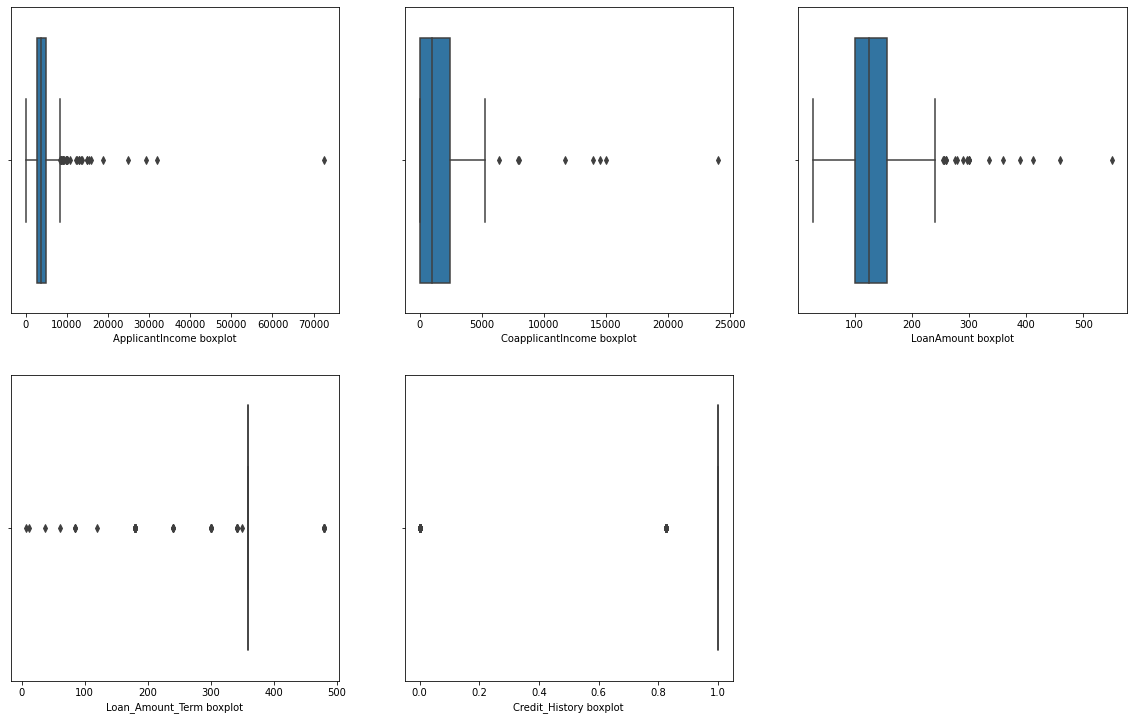

In [261]:
plt.figure(figsize=(20,80))
plotnumber=1
for col in num_var:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df_test[col])
    plt.xlabel(f'{col} boxplot')
    plotnumber+=1

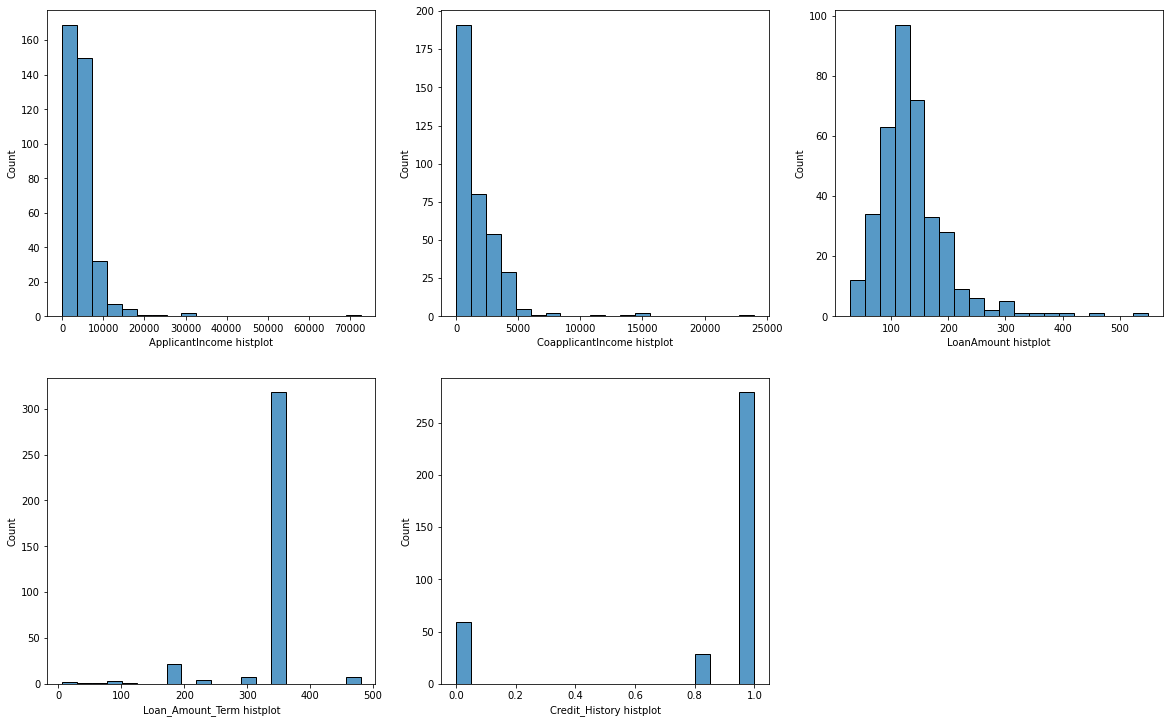

In [262]:
plt.figure(figsize=(20,80))
plotnumber=1
for col in num_var:
    ax=plt.subplot(12,3,plotnumber)
    sns.histplot(df_test[col],bins=20)
    plt.xlabel(f'{col} histplot')
    plotnumber+=1

From the above two plots it can be concluded that ApplicantIncome, CoapplicantIncome and LoanAmount have outliers and right skewed. So let's use normalization in these features. Also, since ApplicantIncome and CoapplicantIncome are highly correlated so remove them and make a new feature TotalIncome instead of these two variables.

In [263]:
df_test['LoanAmount_log']=np.log(df_test['LoanAmount']+1)

<AxesSubplot:>

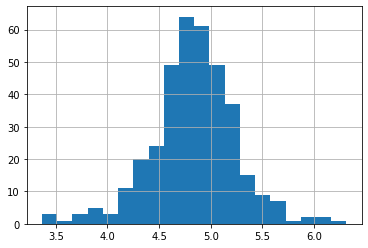

In [264]:
df_test['LoanAmount_log'].hist(bins=20)

In [265]:
df_test['Total_Income']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']

In [266]:
df_test['Total_Income_log']=np.log(df_test['Total_Income']+1)

<AxesSubplot:>

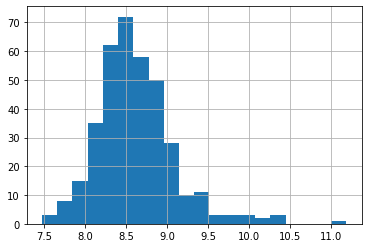

In [267]:
df_test['Total_Income_log'].hist(bins=20)

In [268]:
df_test=df_test.drop(columns=['ApplicantIncome','CoapplicantIncome','Loan_ID'],axis=1)

In [269]:
df_test.shape

(367, 12)

In [270]:
cat_var=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [271]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_var:
    df_test[col]=le.fit_transform(df_test[col])

In [272]:
y_pred=lr_model.predict(df_test)

In [273]:
y_pred=le.fit_transform(y_pred)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,